In [12]:
import networkx as nx
import json
import requests
import os

In [5]:

url = "https://api.nb.no/dhlab/nb_ngram_galaxies/galaxies/query"

def word_graph(word = None, cutoff = 20, corpus = 'all'):
    """ corpus = bok, avis or all"""
    params = {
        'terms':word, 
        'leaves':0,
        'limit':cutoff,
        'corpus':corpus,
    }
    r = requests.get(url, params = params)
    G = nx.DiGraph()
    edgelist = []
    if r.status_code == 200:
        #graph = json.loads(result.text)
        graph = r.json()
        #print(graph)
        nodes = graph['nodes']
        edges = graph['links']
        for edge in edges:
            source, target = (nodes[edge['source']]['name'], nodes[edge['target']]['name'])
            if source.isalnum() and target.isalnum():
                edgelist += [(source, target, abs(edge['value']))]
        G.add_weighted_edges_from(edgelist)
    return G

In [4]:
words = """Energi 
Materie
Entusiasme
Pågangsmot
Livskraft
Livsglede
Virkelyst
Ånd 
Kraft
Dødsdrift
Effekt 
Glede
Effektivisering 
Energieffektivisering
Vitalitet 
Arbeidslyst
Initiativ 
Optimisme
Fornybar
Energiomlegging
Klima 
Miljø
Atom 
Atomkraft
Kjernekraft
Fusjon 
Fisjon
Elektrisitet 
Bærekraft
Forbruk
Vannkraft
Fossekraft
Hydrogen 
Forbrenning
Klimagass
Klimagassutslipp
Kildesortering
Energikilder
Energibærer 
Termodynamikk 
Termodynamikkens lover
Transportsystem
Energiressurser
Grunnrente 
Konsesjonslov
Resirkulering
Vindkraft 
Vindmølle
Utslipp  
Damp 
Dampmaskin""".split()



In [6]:
words += [x.lower() for x in words]

In [7]:
words

['Energi',
 'Materie',
 'Entusiasme',
 'Pågangsmot',
 'Livskraft',
 'Livsglede',
 'Virkelyst',
 'Ånd',
 'Kraft',
 'Dødsdrift',
 'Effekt',
 'Glede',
 'Effektivisering',
 'Energieffektivisering',
 'Vitalitet',
 'Arbeidslyst',
 'Initiativ',
 'Optimisme',
 'Fornybar',
 'Energiomlegging',
 'Klima',
 'Miljø',
 'Atom',
 'Atomkraft',
 'Kjernekraft',
 'Fusjon',
 'Fisjon',
 'Elektrisitet',
 'Bærekraft',
 'Forbruk',
 'Vannkraft',
 'Fossekraft',
 'Hydrogen',
 'Forbrenning',
 'Klimagass',
 'Klimagassutslipp',
 'Kildesortering',
 'Energikilder',
 'Energibærer',
 'Termodynamikk',
 'Termodynamikkens',
 'lover',
 'Transportsystem',
 'Energiressurser',
 'Grunnrente',
 'Konsesjonslov',
 'Resirkulering',
 'Vindkraft',
 'Vindmølle',
 'Utslipp',
 'Damp',
 'Dampmaskin',
 'energi',
 'materie',
 'entusiasme',
 'pågangsmot',
 'livskraft',
 'livsglede',
 'virkelyst',
 'ånd',
 'kraft',
 'dødsdrift',
 'effekt',
 'glede',
 'effektivisering',
 'energieffektivisering',
 'vitalitet',
 'arbeidslyst',
 'initiativ',
 'op

In [10]:
klynger = {'energi-vital': "energi, Energi, vitalitet, Vitalitet, livsglede, livskraft, virkelyst",
'energi-miljø': "energi, klima, fossekraft, energikilder",
'energi-økonomi': "energi, konsesjonslov, grunnrente, miljø, arbeidslyst"}

In [6]:
G = word_graph("energi, vitalitet")

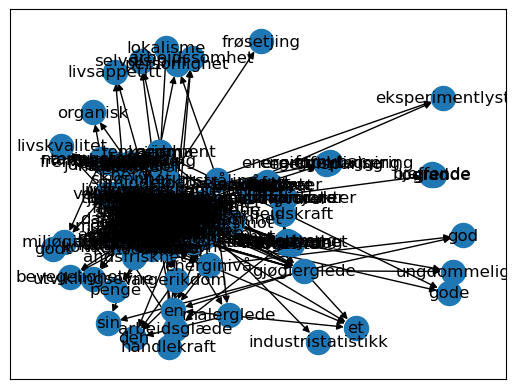

In [1]:
!pwd

/mnt/disk1/Github/polnet_plotly


In [13]:
for kind in klynger:
    G = word_graph(word=klynger[kind])
    data = {
        "nodes": [{"id": node} for node in G.nodes()],
        "links": [{"source": u, "target": v} for u, v in G.edges()]
    }
    
    with open(os.path.join('d3_force_layout', f'{kind}-network.json'), 'w') as f:
        json.dump(data, f)

In [14]:
klynger.keys()

dict_keys(['energi-vital', 'energi-miljø', 'energi-økonomi'])